# Midterm Study Guide

## Chapter 2

### 2.1 Basic Data Types

In [4]:
#type conversions
string = "Hello"
integer = 2
boolean = True
floaty = 2.50
#string
print(string + "Word")
#float
type(floaty + integer)
type(floaty + boolean)

#manual conversions
x = 3
y = "3.14159"
x + float(y)

HelloWord
HelloWord


6.14159

### 2.2 Operators and Functions

In [15]:
#operators
print(14 // 3)
print(14 % 3)

#round function
round(5.78888, 2)
round(5.78888)
#sort function using .
my_nums = [1,2,3,4,5]
my_nums.sort(reverse = True)
print(my_nums)

4
2
[5, 4, 3, 2, 1]
4
2
[5, 4, 3, 2, 1]


### 2.3 Data Structures

In [18]:
#list
x = ["a", 3, True]
print(x[0]) # This returns a list
print(x[0:2]) # This returns multiple elements in the list
print(x.pop(0))

#arrays
from numpy import array
favorite_cats = array(["Grumpy", "Garfield", "Jorts", "Jean"])
favorite_cats
favorite_cats[2] = "Nyan Cat"
favorite_cats

a
['a', 3]
a
a
['a', 3]
a


array(['Grumpy', 'Garfield', 'Nyan Cat', 'Jean'], dtype='<U8')

#### Boolean Masking

In [23]:
# Define a character vector
weekdays = array(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
weekend = array(["Sunday", "Saturday"])

# Create logical vectors manually
relax_days = array([True, False, False, False, False, False, True])

# Create logical vectors automatically
from numpy import isin     # get a special function for arrays
relax_days = isin(weekdays, weekend) 

print(relax_days)

# Using ~ to reverse the True and False
print(weekdays[~relax_days])

[ True False False False False False  True]
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
[ True False False False False False  True]
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


## Pandas and Boolean Masking

In [28]:
import pandas as pd

dat = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")
## using methods
dat.body_mass_g.mean()

## editing elements
dat.body_mass_g[0] = 10000000
dat.body_mass_g

## boolean masking
big_penguins = dat.body_mass_g > 6000
dat.loc[big_penguins]

<positron-console-cell-28>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<positron-console-cell-28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,10000000.0,male,2007
169,170,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007
185,186,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007


## Chapter 3: Grammar of Graphics

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


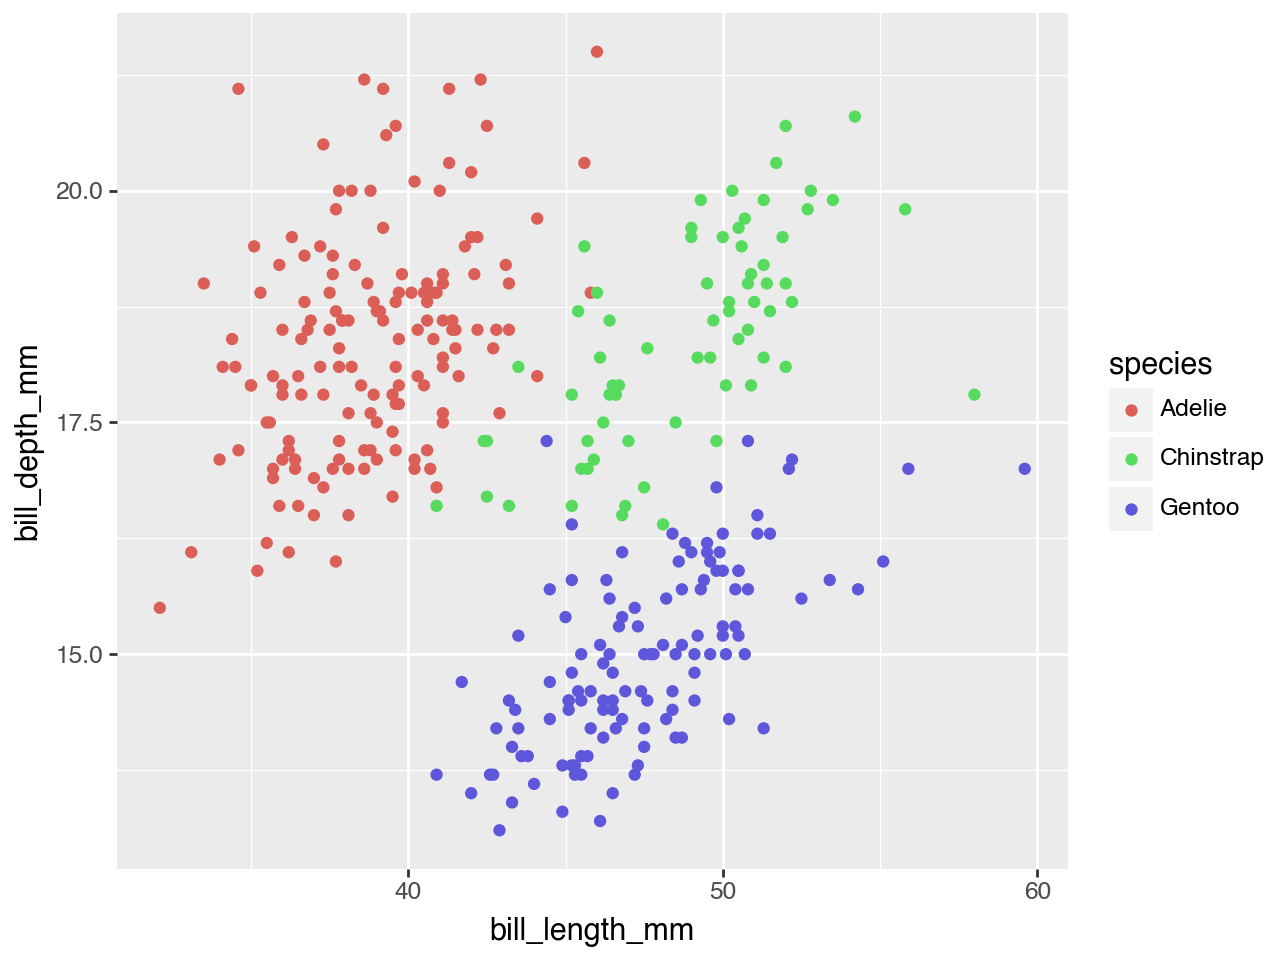

In [70]:
from plotnine import *
from palmerpenguins import load_penguins
penguins = load_penguins()
#boxplot
(ggplot(penguins,
aes(
  x = "species",
  y = "bill_length_mm"))
+ geom_boxplot(fill = "blue")
)
#scatter
(ggplot(penguins,
aes(
  x = "bill_length_mm",
  y = "bill_depth_mm",
  color = "species"
))
+ geom_point()
)

## Chapter 4

### Select

In [4]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
#selecting one variable
df_titanic.loc[:, "age"]
df_titanic["age"]
df_titanic.age
#selecting multiple variables
df_titanic.loc[:, ["age", "fare"]].head()
df_titanic[["age", "fare"]].head()

,age,fare
0,42.0,7.11
1,13.0,20.05
2,16.0,20.05
3,39.0,20.05
4,16.0,7.13


### Filter

In [10]:
#selecting based on index (fourth row) (returns a series)
df_titanic.iloc[3]
#multiple rows (returns a dataframe)
df_titanic.iloc[[1, 3]]
#range of rows
df_titanic.iloc[3:9]
#using boolean masking
df_titanic[df_titanic["age"] > 30]
#multiple conditions
df_titanic[(df_titanic["age"] > 30) & (df_titanic["gender"] == "female")]

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
12,"Ahlin, Mrs. Johanna Persdotter",female,40.0,3rd,S,Sweden,7546.0,9.0906,0
15,"Aldworth, Mr. Augustus Henry",male,35.0,2nd,S,England,248744.0,13.0000,0
21,"Allen, Mr. William Henry",male,39.0,3rd,S,England,373450.0,8.0100,0
...,...,...,...,...,...,...,...,...,...
2197,"Worthman, Mr. William Henry",male,37.0,engineering crew,S,England,NaN,NaN,0
2200,"Wright, Mr. William",male,40.0,victualling crew,S,England,NaN,NaN,1
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1


### Mutate

In [18]:
#take advantage of vectorization
df_titanic["nonsense"] = df_titanic["fare"] / df_titanic["age"]
#converting quant to categorical
df_titanic["age_cat"] = pd.cut(df_titanic["age"],
                              bins = [0, 18, 100],
                              labels = ["child", "adult"])

#categorical to quantitative (dummy)
df_titanic["female"] = 1 * (df_titanic["gender"] == "female")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,nonsense,age_cat,female
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,0.169286,adult,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,1.542308,child,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,1.253125,child,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,0.514103,adult,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,0.445625,child,1


## Chapter 5

### Pivoting 

In [77]:
#wide to long
# Population data from GapMinder
import pandas as pd
population = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/pop.csv")
long_population = population.melt(id_vars=["country"], var_name="year", value_name="population")
long_population.head()

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,UAE,1800,40.2k


## Chapter 6

In [21]:
#scope 
a = 10

def myfun(a):
  
  a = a + 10
  
  return a


print(myfun(a))

print(a + 5)

refined_results = results.find_all("class name", string="search text")

20
15
20
15


## Chapter 7

In [81]:
for i in range(100,97,-1):
  print(str(i) + " bottles of beer on the wall")
  print(str(i) + " bottles of beer")
  print(" take one down, pass it around,")
  print(str(i-1) + " bottles of beer on the wall")

100 bottles of beer on the wall
100 bottles of beer
 take one down, pass it around,
99 bottles of beer on the wall
99 bottles of beer on the wall
99 bottles of beer
 take one down, pass it around,
98 bottles of beer on the wall
98 bottles of beer on the wall
98 bottles of beer
 take one down, pass it around,
97 bottles of beer on the wall
100 bottles of beer on the wall
100 bottles of beer
 take one down, pass it around,
99 bottles of beer on the wall
99 bottles of beer on the wall
99 bottles of beer
 take one down, pass it around,
98 bottles of beer on the wall
98 bottles of beer on the wall
98 bottles of beer
 take one down, pass it around,
97 bottles of beer on the wall


### Boolean Masking

In [84]:
a_vec = np.array([-2, 1, -3, -9, 7])

is_pos = a_vec > 0

a_vec[is_pos] = np.sqrt(a_vec[is_pos])

print(is_pos)
print(a_vec)

[False  True False False  True]
[-2  1 -3 -9  2]
[False  True False False  True]
[-2  1 -3 -9  2]


## Chapter 9

In [23]:
string_1 = "Moses supposes his toeses are roses,"
string_2 = "Moses supposes erroneously."

string_1 + ", but " + string_2

string_1[0:5]
string_1[5:]
string_2[-12:-1]

's erroneously'

In [25]:
me = "Kelly"
me_list = ["Kelly"]

print(len(me))
print(len(me_list))
print(len(me_list[0]))

string_4 = "My name is {lastname}, {firstname} {lastname}."
string_4.format(firstname = "James", lastname = "Baldwin")


new_list = list(map(lambda x: x.replace("fish", "moose"), fish_list))


5
1
5
5
1
5


'My name is Baldwin, James Baldwin.'

### Regular Expressions

In [27]:
import re
names = "Key, Kely, Kelly, Kellly, Kelllly"
re.findall(r"Kel+y", names)
re.findall(r"Kel*y", names)
re.findall(r"Kel?y", names)
re.findall(r"Kel{2}y", names)
re.findall(r"Kel{2,3}y", names)

#escaping
string_5 = "Are you *really* happy?"
re.findall(r"\*\w+\*", string_5) 

['Kelly', 'Kellly']

In [68]:
from numpy import matrix
x = matrix([[1, 2, 3], [4, 5, 6]])
x[1, 2]

6

In [74]:
#environments
#EXAMPLE 1
b = 10

def myfun():
  b = 20
  return b + 1

myfun()
#local environment: b = 20 because you are not reassigning
#global environment: b = 10

#EXAMPLE 2
def myfun2():
  a = 10
  return a + 1

myfun2()
#local environment: a = 10 because you are not reassigning
#global environment: a does not exist


11

In [66]:
nursery_rhyme = "Peter Piper picked a peck of pickled peppers, A peck of pickled peppers Peter Piper picked; If Peter Piper picked a peck of pickled peppers, Where’s the peck of pickled peppers Peter Piper picked?"
nursery_lower = nursery_rhyme.lower()
len(re.findall(r"\bp", nursery_lower))

24